### Objective: 

The power plant of Combined Cycle Power Plant over 6 years (2006-2011) was set to work with full load. The features in the dataset consists of hourly average ambient variables Temperature (T), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the plant.

#### Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importing the dataset

In [7]:
df = pd.read_excel('E:/Project/Plant_data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Understanding the data 

In [8]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [12]:
# Checking for the missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [14]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [20]:
# Visualising the data 

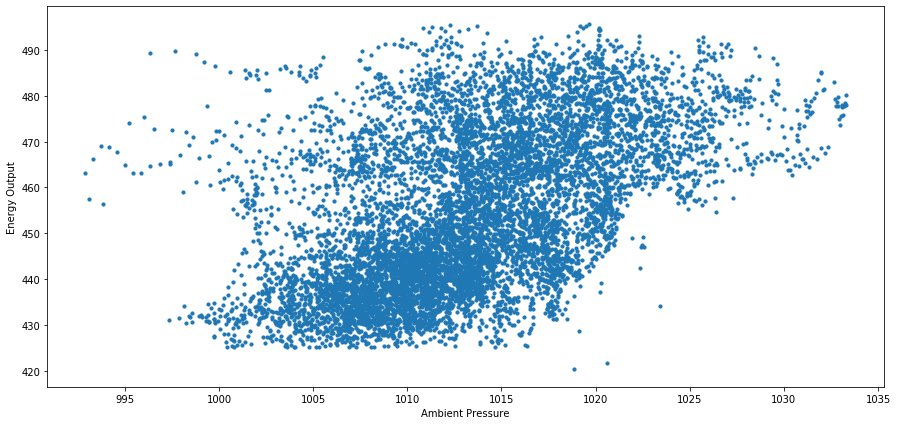

In [18]:
#Relationship beetween Ambient Pressure and Energy Output
plt.figure(figsize=(15,7))
plt.scatter(x=df['AP'], y=df['PE'], s=10)
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.show()

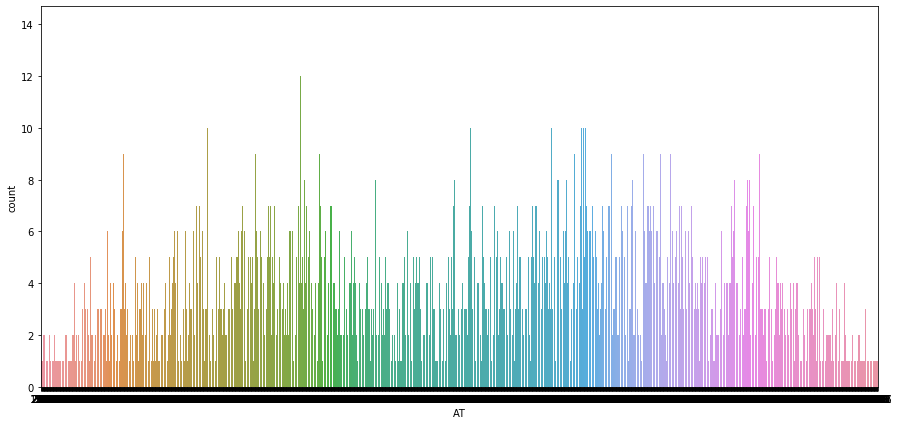

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x="AT", data=df)

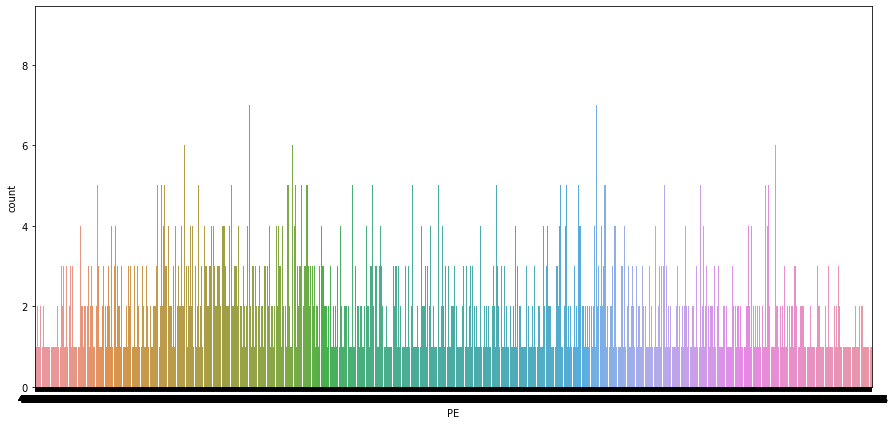

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x="PE", data=df)

#### Applying ML Algorithms 

In [21]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Multiple Linear Regression 

In [23]:
# Training the multiple linear regression model on training set 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)  #print options will print only upto 2 decimal 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [25]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9325315554761303

#### Polynomial Regression

In [26]:
# Training the polynomial regression model on training set 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Predicting the Test set results

y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


In [28]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9458193347147237

#### Decision Tree Regression

In [30]:
# Training the Decision Tree Regression model on the Training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [462.81 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.55 463.28]]


In [32]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9226091050550043

####  Random Forest Regression

In [33]:
# Training the Random Forest Regression model on the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.78 431.23]
 [457.99 460.01]
 [463.14 461.14]
 ...
 [470.16 473.26]
 [439.51 438.  ]
 [460.32 463.28]]


In [35]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9615980699813017